<a href="https://colab.research.google.com/github/Emmaka9/antimicrobial-peptides-prediction/blob/main/peptide_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Activity of Short Antimicrobial Peptides**


# **Install conda**

In [1]:
# uninstall previous sklearn and install sklearn version 0.23.1 which is a requirement for lazypredict that we used later in the project
!pip uninstall s -y
!pip install scikit-learn==0.23.1

     |████████████████████████████████| 6.8 MB 5.8 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.23.1 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.23.1 which is incompatible.


In [2]:
import sklearn
sklearn.__version__ # check sklearn version to make sure

'0.23.1'

In [3]:
################################################################################
# INSTALL CONDA ON GOOGLE COLAB
################################################################################
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2022-05-04 06:53:15--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M  83.3MB/s    in 1.0s    

2022-05-04 06:53:16 (83.3 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.

# **Download and Install Pfeature**
Pfeature computes the properties of the amino acids, which in turn molecular properties of the peptides since peptides are just short stretches of amino acids (usually ranges from 2(dipeptide) to more than 50). We use these properties as features for our machine learning model.

In [4]:
! wget https://github.com/raghavagps/Pfeature/raw/master/PyLib/Pfeature.zip

--2022-05-04 06:53:39--  https://github.com/raghavagps/Pfeature/raw/master/PyLib/Pfeature.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/raghavagps/Pfeature/master/PyLib/Pfeature.zip [following]
--2022-05-04 06:53:40--  https://raw.githubusercontent.com/raghavagps/Pfeature/master/PyLib/Pfeature.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 511222 (499K) [application/zip]
Saving to: ‘Pfeature.zip’

Pfeature.zip        100%[===================>] 499.24K  --.-KB/s    in 0.02s   

2022-05-04 06:53:40 (21.8 MB/s) - ‘Pfeature.zip’ saved [511222/511222]



In [5]:
! unzip Pfeature.zip # unzip the pfeture library

Archive:  Pfeature.zip
   creating: Pfeature/
  inflating: __MACOSX/._Pfeature     
  inflating: Pfeature/PKG-INFO       
  inflating: __MACOSX/Pfeature/._PKG-INFO  
  inflating: Pfeature/.DS_Store      
  inflating: __MACOSX/Pfeature/._.DS_Store  
  inflating: Pfeature/README         
  inflating: __MACOSX/Pfeature/._README  
  inflating: Pfeature/setup.py       
  inflating: __MACOSX/Pfeature/._setup.py  
  inflating: Pfeature/Functions_Tables.pdf  
  inflating: __MACOSX/Pfeature/._Functions_Tables.pdf  
   creating: Pfeature/build/
  inflating: __MACOSX/Pfeature/._build  
  inflating: Pfeature/Pfeature_Descriptors.pdf  
  inflating: __MACOSX/Pfeature/._Pfeature_Descriptors.pdf  
   creating: Pfeature/Pfeature/
  inflating: __MACOSX/Pfeature/._Pfeature  
   creating: Pfeature/build/lib/
  inflating: __MACOSX/Pfeature/build/._lib  
  inflating: Pfeature/Pfeature/bonds.csv  
  inflating: Pfeature/Pfeature/pfeature.py  
  inflating: Pfeature/Pfeature/AAIndexNames.csv  
  inflating: Pfea

In [6]:
#change directory into the unzipped Pfeature library
% cd Pfeature

/content/Pfeature


In [7]:
# install the pfeature library using the python setup.py i.e manually, since the pfeature library isn't availble on pip
! python setup.py install

/usr/local/lib/python3.7/distutils/dist.py:274: UserWarning: Unknown distribution option: 'zip_safe'
  warnings.warn(msg)
running install
running build
running build_py
copying Pfeature/__init__.py -> build/lib/Pfeature
copying Pfeature/pfeature.py -> build/lib/Pfeature
running install_lib
creating /usr/local/lib/python3.7/site-packages/Pfeature
copying build/lib/Pfeature/z_aaindex.csv -> /usr/local/lib/python3.7/site-packages/Pfeature
copying build/lib/Pfeature/PhysicoChemical.csv -> /usr/local/lib/python3.7/site-packages/Pfeature
copying build/lib/Pfeature/bonds.csv -> /usr/local/lib/python3.7/site-packages/Pfeature
copying build/lib/Pfeature/Grantham.csv -> /usr/local/lib/python3.7/site-packages/Pfeature
copying build/lib/Pfeature/bin_di.csv -> /usr/local/lib/python3.7/site-packages/Pfeature
copying build/lib/Pfeature/aa_attr_group.csv -> /usr/local/lib/python3.7/site-packages/Pfeature
copying build/lib/Pfeature/__init__.py -> /usr/local/lib/python3.7/site-packages/Pfeature
copying 

# **Install CD-HIT**

CD-HIT library helps to get rid of any redundancy in the peptide sequences.
We use conda to install CD-HIT.

In [8]:
# install cd-hit using conda
! conda install -c bioconda cd-hit -y

Solving environment: \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - cd-hit


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.4.26  |       h06a4308_0         124 KB
    cd-hit-4.8.1               |       hdbcaa40_0         221 KB  bioconda
    certifi-2021.10.8          |   py37h06a4308_2         151 KB
    conda-4.12.0               |   py37h06a4308_0        14.5 MB
    openssl-1.1.1n             |       h7f8727e_0         2.5 MB
    ------------------------------------------------------------
                                           Total:        17.5 MB

The following NEW packages will be INSTALLED:

  cd-hit             bioconda/linux-64::cd-hit-4.8.1-hdbcaa40_0

The following packages will be UPDATED:

  ca-certificates                                2020.1.1-0 --> 2022.4.26-h06a4308_0
  certifi        

# **Load peptide dataset**

The dataset format is in `fasta` format.</br>
**Fasta** format is ASCII text file that represents amino acid(protein) or nucleotide sequences, in which nucleotides and amino acids are represented by single-letter codes. Sequence names and comments can be placed in front of the sequences in this format. It has become a near universal standard in bioinformatics.

The description line or header/identifier line begins with `>`, gives a name and/or a unique identifer for the sequence, and can also contain additional information.

For example, in following is a peptide with 26 aa
```
>nonamp5_30_1387
GLPICGETCFKTKCYTKGCSCSYPVCKRN
```
Here, `>` marks the beginning, `nonamp5_30_1387` is the identifier of the peptide. **nonamp** mean there is no antimicrobial activity, i.e. it is an example from the negative data.

In [9]:
# download the positive training data
! wget https://raw.githubusercontent.com/Emmaka9/antimicrobial-peptides-prediction/main/dataset/train_set/train_po.fasta

--2022-05-04 06:53:51--  https://raw.githubusercontent.com/Emmaka9/antimicrobial-peptides-prediction/main/dataset/train_set/train_po.fasta
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 52619 (51K) [text/plain]
Saving to: ‘train_po.fasta’

train_po.fasta      100%[===================>]  51.39K  --.-KB/s    in 0.008s  

2022-05-04 06:53:52 (6.34 MB/s) - ‘train_po.fasta’ saved [52619/52619]



In [10]:
# download the negative training data
! wget https://raw.githubusercontent.com/Emmaka9/antimicrobial-peptides-prediction/main/dataset/train_set/train_ne.fasta

--2022-05-04 06:53:52--  https://raw.githubusercontent.com/Emmaka9/antimicrobial-peptides-prediction/main/dataset/train_set/train_ne.fasta
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57206 (56K) [text/plain]
Saving to: ‘train_ne.fasta’

train_ne.fasta      100%[===================>]  55.87K  --.-KB/s    in 0.007s  

2022-05-04 06:53:52 (7.40 MB/s) - ‘train_ne.fasta’ saved [57206/57206]



In [11]:
# download the positive test data
! wget https://raw.githubusercontent.com/Emmaka9/antimicrobial-peptides-prediction/main/dataset/test_set/test_po.fasta

--2022-05-04 06:53:52--  https://raw.githubusercontent.com/Emmaka9/antimicrobial-peptides-prediction/main/dataset/test_set/test_po.fasta
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3946 (3.9K) [text/plain]
Saving to: ‘test_po.fasta’

test_po.fasta       100%[===================>]   3.85K  --.-KB/s    in 0s      

2022-05-04 06:53:52 (45.1 MB/s) - ‘test_po.fasta’ saved [3946/3946]



In [12]:
# download the negative test data
! wget https://raw.githubusercontent.com/Emmaka9/antimicrobial-peptides-prediction/main/dataset/test_set/test_ne.fasta

--2022-05-04 06:53:52--  https://raw.githubusercontent.com/Emmaka9/antimicrobial-peptides-prediction/main/dataset/test_set/test_ne.fasta
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8659 (8.5K) [text/plain]
Saving to: ‘test_ne.fasta’

test_ne.fasta       100%[===================>]   8.46K  --.-KB/s    in 0s      

2022-05-04 06:53:52 (50.7 MB/s) - ‘test_ne.fasta’ saved [8659/8659]



In [13]:
# print negative training data using bash command "cat"
! cat test_ne.fasta

>unip30_cdh10_stdif_dpAmpepTr30_iamp2l_ampScan_ampepTr_cdh8_sample94_1
NYIYSGHNYHQ
>unip30_cdh10_stdif_dpAmpepTr30_iamp2l_ampScan_ampepTr_cdh8_sample94_2
DPNATIIMLGTGTGIAPFR
>unip30_cdh10_stdif_dpAmpepTr30_iamp2l_ampScan_ampepTr_cdh8_sample94_3
MGQGAVEGQLFYNVQ
>unip30_cdh10_stdif_dpAmpepTr30_iamp2l_ampScan_ampepTr_cdh8_sample94_4
MSQASSSPGEGPSSEAAAISEAEAASGS
>unip30_cdh10_stdif_dpAmpepTr30_iamp2l_ampScan_ampepTr_cdh8_sample94_5
INWKKIASIGKEVLKAL
>unip30_cdh10_stdif_dpAmpepTr30_iamp2l_ampScan_ampepTr_cdh8_sample94_6
MKKAWWKEGVVYQIY
>unip30_cdh10_stdif_dpAmpepTr30_iamp2l_ampScan_ampepTr_cdh8_sample94_7
AINSESGVRSVVPQPCNALPNQGPEK
>unip30_cdh10_stdif_dpAmpepTr30_iamp2l_ampScan_ampepTr_cdh8_sample94_8
NWRKILGKIAKVAAGLLGSMLAGYQV
>unip30_cdh10_stdif_dpAmpepTr30_iamp2l_ampScan_ampepTr_cdh8_sample94_9
YGEPIGVETLTK
>unip30_cdh10_stdif_dpAmpepTr30_iamp2l_ampScan_ampepTr_cdh8_sample94_10
AGDTSSEAKGMWFGPRL
>unip30_cdh10_stdif_dpAmpepTr30_iamp2l_ampScan_ampepTr_cdh8_sample94_11
ALSVPVFAVAPLNKK
>unip

# **Remove redundant sequences using CD-HIT**

In [14]:
# remove peptides sequences with peptide similarity > 0.99 from train_po.fasta
! cd-hit -i train_po.fasta -o train_po_cdhit.txt -c 0.99

Program: CD-HIT, V4.8.1, Mar 01 2019, 14:14:47
Command: cd-hit -i train_po.fasta -o train_po_cdhit.txt -c
         0.99

Started: Wed May  4 06:53:53 2022
                            Output                              
----------------------------------------------------------------
total seq: 1445
longest and shortest : 30 and 11
Total letters: 30071
Sequences have been sorted

Approximated minimal memory consumption:
Sequence        : 0M
Buffer          : 1 X 10M = 10M
Table           : 1 X 65M = 65M
Miscellaneous   : 0M
Total           : 76M

Table limit with the given memory limit:
Max number of representatives: 4000000
Max number of word counting entries: 90485873

comparing sequences from          0  to       1445
.
     1445  finished       1337  clusters

Approximated maximum memory consumption: 76M
writing new database
writing clustering information
program completed !

Total CPU time 0.09


In [15]:
# remove peptides sequences with peptide similarity > 0.99 from train_po.fasta
! cd-hit -i train_ne.fasta -o train_ne_cdhit.txt -c 0.99

Program: CD-HIT, V4.8.1, Mar 01 2019, 14:14:47
Command: cd-hit -i train_ne.fasta -o train_ne_cdhit.txt -c
         0.99

Started: Wed May  4 06:53:53 2022
                            Output                              
----------------------------------------------------------------
total seq: 1445
longest and shortest : 30 and 11
Total letters: 30071
Sequences have been sorted

Approximated minimal memory consumption:
Sequence        : 0M
Buffer          : 1 X 10M = 10M
Table           : 1 X 65M = 65M
Miscellaneous   : 0M
Total           : 76M

Table limit with the given memory limit:
Max number of representatives: 4000000
Max number of word counting entries: 90485331

comparing sequences from          0  to       1445
.
     1445  finished       1422  clusters

Approximated maximum memory consumption: 76M
writing new database
writing clustering information
program completed !

Total CPU time 0.08


In [16]:
# remove peptides sequences with peptide similarity > 0.99 from test_po.fasta
! cd-hit -i test_po.fasta -o test_po_cdhit.txt -c 0.99

Program: CD-HIT, V4.8.1, Mar 01 2019, 14:14:47
Command: cd-hit -i test_po.fasta -o test_po_cdhit.txt -c 0.99

Started: Wed May  4 06:53:53 2022
                            Output                              
----------------------------------------------------------------
total seq: 94
longest and shortest : 30 and 11
Total letters: 1793
Sequences have been sorted

Approximated minimal memory consumption:
Sequence        : 0M
Buffer          : 1 X 10M = 10M
Table           : 1 X 65M = 65M
Miscellaneous   : 0M
Total           : 75M

Table limit with the given memory limit:
Max number of representatives: 4000000
Max number of word counting entries: 90517567

comparing sequences from          0  to         94

       94  finished         94  clusters

Approximated maximum memory consumption: 75M
writing new database
writing clustering information
program completed !

Total CPU time 0.07


In [17]:
# remove peptides sequences with peptide similarity > 0.99 from test_ne.fasta
! cd-hit -i test_ne.fasta -o test_ne_cdhit.txt -c 0.99

Program: CD-HIT, V4.8.1, Mar 01 2019, 14:14:47
Command: cd-hit -i test_ne.fasta -o test_ne_cdhit.txt -c 0.99

Started: Wed May  4 06:53:53 2022
                            Output                              
----------------------------------------------------------------
total seq: 94
longest and shortest : 30 and 11
Total letters: 1806
Sequences have been sorted

Approximated minimal memory consumption:
Sequence        : 0M
Buffer          : 1 X 10M = 10M
Table           : 1 X 65M = 65M
Miscellaneous   : 0M
Total           : 75M

Table limit with the given memory limit:
Max number of representatives: 4000000
Max number of word counting entries: 90517553

comparing sequences from          0  to         94

       94  finished         94  clusters

Approximated maximum memory consumption: 75M
writing new database
writing clustering information
program completed !

Total CPU time 0.07


In [18]:
! ls -l 

total 700
drwxr-xr-x 3 root root   4096 Oct 23  2019 build
-rw-r--r-- 1 root root  86079 Sep 29  2020 Functions_Tables.pdf
drwxr-xr-x 2 root root   4096 Sep 29  2020 Pfeature
-rw-r--r-- 1 root root 221146 Sep 29  2020 Pfeature_Descriptors.pdf
-rw-r--r-- 1 root root    971 Sep 28  2020 PKG-INFO
-rw-r--r-- 1 root root   1265 Sep 29  2020 README
-rw-r--r-- 1 root root   1267 Sep 29  2020 setup.py
-rw-r--r-- 1 root root   8659 May  4 06:53 test_ne_cdhit.txt
-rw-r--r-- 1 root root   4314 May  4 06:53 test_ne_cdhit.txt.clstr
-rw-r--r-- 1 root root   8659 May  4 06:53 test_ne.fasta
-rw-r--r-- 1 root root   3946 May  4 06:53 test_po_cdhit.txt
-rw-r--r-- 1 root root   4211 May  4 06:53 test_po_cdhit.txt.clstr
-rw-r--r-- 1 root root   3946 May  4 06:53 test_po.fasta
-rw-r--r-- 1 root root  54341 May  4 06:53 train_ne_cdhit.txt
-rw-r--r-- 1 root root  61425 May  4 06:53 train_ne_cdhit.txt.clstr
-rw-r--r-- 1 root root  57206 May  4 06:53 train_ne.fasta
-rw-r--r-- 1 root root  47229 May  4 06:53 tr

In [19]:
# number of peptides in train_po, after CD-HIT
! grep ">" train_po_cdhit.txt | wc -l

1337


In [20]:
# number of peptides in train_po, before CD-HIT
! grep ">" train_po.fasta | wc -l

1529


In [21]:
# number of peptides in train_ne, before CD-HIT
! grep ">" train_ne.fasta | wc -l

1529


In [22]:
# number of peptides in train_ne, after CD-HIT
! grep ">" train_ne_cdhit.txt | wc -l

1422


# **Calculate features using the Pfeature library**

Feature classes provided by Pfeature is summarized in the tables below.

**Composition Based Features**

Feature claass | Description | Function
---|---|---
AAC | Amino acid composition | aac_wp
DPC | Dipeptide composition | dpc_wp
TPC | Tripeptide composition | tpc_wp
ABC | Atom and bond composition | atc_wp, btc_wp
PCP | Physico-chemical properties | pcp_wp
AAI | Amino acid index composition | aai_wp
RRI | Repetitive Residue Information | rri_wp
DDR | Distance distribution of residues |ddr_wp
PRI | Physico-chemical properties repeat composition | pri_wp
SEP | Shannon entropy | sep_wp
SER | Shannon entropy of residue level | ser_wp
SPC | Shannon entropy of physicochemical property | spc_wp
ACR | Autocorrelation | acr_wp
CTC | Conjoint Triad Calculation | ctc_wp
CTD | Composition enhanced transition distribution | ctd_wp
PAAC | Pseudo amino acid composition | paac_wp
APAAC | Amphiphilic pseudo amino acid composition | apaac_wp
QSO | Quasi sequence order | qos_wp
SOC | Sequence order coupling | soc_wp

[Pfeature Manual](https://webs.iiitd.edu.in/raghava/pfeature/Pfeature_Manual.pdf)

### **Define functions for calculating the different features**

In [23]:
import pandas as pd

In [24]:
!pwd

/content/Pfeature



**aac_wp**: computes the percentage composition of each amino-acid in a peptide.
E.g. MISDSQIFVALLFALVSAVLAIRLGTDLYQ is peptide. It has 30 amino acid, and
3 S (Serine). So, the percentage compostion of S is (3/30) = 0.1 = 10%

**Pseudo code of the funciton to compute features:**
* convert the fasta data file into a csv file
* apply aac_wp function from Pfeature.pfeature on the input file, and write its output on the csv file
* read the output csv file in a pandas dataframe
* return the dataframe


In [25]:
# calculate Amino acid composition (AAC) for the whole peptide
#aac_wp : Amino acid composition_whole peptide 

'''
aac_wp: computes the percentage composition of each amino-acid in a peptide.
E.g. MISDSQIFVALLFALVSAVLAIRLGTDLYQ is peptide. It has 30 amino acid, and
3 S (Serine). So, the percentage compostion of S is (3/30) = 0.1 = 10%
'''

from Pfeature.pfeature import aac_wp # import aac_wp func to compute aac_wp

'''
Function: definition to compute aac_wp
Parameter: input - will be a fasta file of the peptides after performing the CD-HIT

'''
def aac(input):
  a = input.rstrip('txt') #strip the .txt from the file name
  output = a + 'aac.csv' # add aac.csv at the end of the file: rename the file
  df_out = aac_wp(input, output) # apply aac_wp on the input file, which will spit out the output in the output file with extension aac.csv
  df_in = pd.read_csv(output) # read the output file as pandas dataframe
  return df_in # return the dataframe

aac('test_ne_cdhit.txt')

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,AAC_M,AAC_N,AAC_P,AAC_Q,AAC_R,AAC_S,AAC_T,AAC_V,AAC_W,AAC_Y
0,0.00,0.0,0.00,0.00,0.00,9.09,18.18,9.09,0.00,0.00,0.00,18.18,0.00,9.09,0.00,9.09,0.00,0.00,0.00,27.27
1,10.53,0.0,5.26,0.00,5.26,15.79,0.00,15.79,0.00,5.26,5.26,5.26,10.53,0.00,5.26,0.00,15.79,0.00,0.00,0.00
2,6.67,0.0,0.00,6.67,6.67,20.00,0.00,0.00,0.00,6.67,6.67,6.67,0.00,20.00,0.00,0.00,0.00,13.33,0.00,6.67
3,25.00,0.0,0.00,14.29,0.00,10.71,0.00,3.57,0.00,0.00,3.57,0.00,7.14,3.57,0.00,32.14,0.00,0.00,0.00,0.00
4,11.76,0.0,0.00,5.88,0.00,5.88,0.00,17.65,23.53,11.76,0.00,5.88,0.00,0.00,0.00,5.88,0.00,5.88,5.88,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,7.14,0.0,3.57,3.57,10.71,0.00,0.00,0.00,7.14,10.71,0.00,10.71,10.71,7.14,3.57,7.14,3.57,3.57,0.00,10.71
90,7.69,0.0,0.00,0.00,7.69,15.38,0.00,0.00,15.38,7.69,0.00,0.00,0.00,7.69,0.00,7.69,15.38,7.69,0.00,7.69
91,0.00,0.0,0.00,6.67,6.67,6.67,6.67,6.67,13.33,0.00,0.00,6.67,6.67,6.67,0.00,6.67,6.67,20.00,0.00,0.00
92,10.34,0.0,3.45,3.45,3.45,13.79,3.45,13.79,0.00,17.24,3.45,0.00,0.00,0.00,3.45,6.90,3.45,13.79,0.00,0.00


In [26]:
# Dipeptide composition (DPC)

from Pfeature.pfeature import dpc_wp

def dpc(input):
  a = input.rstrip('txt') #strip the .txt from the file name
  output = a + 'dpc.csv' # add aac.csv at the end of the file: rename the file
  df_out = dpc_wp(input, output, 1) # apply aac_wp on the input file, which will spit out the output in the output file with extension aac.csv
  df_in = pd.read_csv(output) # read the output file as pandas dataframe
  return df_in # return the dataframe

#dpc('train_po_cdhit.txt')


### **Calculate feature for both positive and negative classes + combines the two classes + merge with class labels**

In [27]:
'''
Function definition feature_calc:
    1. calculate features for both positive and negative classes of data
    2. concatenate the both pos and neg classes of data stacked on top of each other
    3. merge with class labels
'''

def feature_calc(po, ne, feature_name):
  # pass in the pos file to feature_name function(aac) to Calculate feature
  po_feature = feature_name(po)
  # pass in the pos file to feature_name function(aac) to Calculate feature
  ne_feature = feature_name(ne)
  # Create class labels in pandas series
  po_class = pd.Series(['positive' for i in range(len(po_feature))])
  ne_class = pd.Series(['negative' for i in range(len(ne_feature))])
  # concatenate pos and neg classes stacked on top of each other (axis=0)
  po_ne_class = pd.concat([po_class, ne_class], axis=0)
  po_ne_class.name = 'class' # set the series name class
  # concatenate pos and neg features
  po_ne_feature = pd.concat([po_feature, ne_feature], axis=0)
  # concatenate feature and class
  df = pd.concat([po_ne_feature, po_ne_class], axis=1)
  return df


'''
feature_train and feature_test are pandas dataframe with 21 columns derived using aac_wp on training data and test data respectively.

'''
pos = 'train_po_cdhit.txt'
neg = 'train_ne_cdhit.txt'
feature_train = feature_calc(pos, neg, aac) # calculate features on training data
#feature = feature_calc(pos, neg, dpc) # DPC
feature_test = feature_calc('test_po_cdhit.txt', 'test_ne_cdhit.txt', aac) # calculate features on test data


# **Data pre-processing**

Convert data into a format that we can use to fit into the model (train the model)
* create dataframe X_train and X_test using the features
* y_train and y_test using the class labels

In [28]:
feature_test # print feature_test

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,...,AAC_N,AAC_P,AAC_Q,AAC_R,AAC_S,AAC_T,AAC_V,AAC_W,AAC_Y,class
0,12.00,0.0,0.00,8.00,0.00,16.00,0.00,0.00,0.00,16.00,...,0.00,4.00,8.00,8.00,12.00,12.00,0.00,4.00,0.00,positive
1,6.25,0.0,6.25,0.00,6.25,18.75,0.00,12.50,12.50,12.50,...,0.00,0.00,0.00,0.00,6.25,0.00,18.75,0.00,0.00,positive
2,0.00,0.0,4.55,0.00,0.00,13.64,0.00,0.00,9.09,4.55,...,4.55,0.00,4.55,31.82,0.00,9.09,4.55,9.09,0.00,positive
3,30.77,0.0,0.00,0.00,7.69,0.00,0.00,0.00,30.77,30.77,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,positive
4,17.39,0.0,0.00,0.00,0.00,13.04,0.00,8.70,17.39,21.74,...,0.00,0.00,0.00,0.00,0.00,8.70,13.04,0.00,0.00,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,7.14,0.0,3.57,3.57,10.71,0.00,0.00,0.00,7.14,10.71,...,10.71,10.71,7.14,3.57,7.14,3.57,3.57,0.00,10.71,negative
90,7.69,0.0,0.00,0.00,7.69,15.38,0.00,0.00,15.38,7.69,...,0.00,0.00,7.69,0.00,7.69,15.38,7.69,0.00,7.69,negative
91,0.00,0.0,0.00,6.67,6.67,6.67,6.67,6.67,13.33,0.00,...,6.67,6.67,6.67,0.00,6.67,6.67,20.00,0.00,0.00,negative
92,10.34,0.0,3.45,3.45,3.45,13.79,3.45,13.79,0.00,17.24,...,0.00,0.00,0.00,3.45,6.90,3.45,13.79,0.00,0.00,negative


In [29]:
# Assigns the features(train/test)  to X(train/test) and class label(train/test)  to Y(train/test) 
X_train = feature_train.drop('class', axis=1) # drop the column 'class' of the feature_train dataframe and assign it to X_train; 
X_test = feature_test.drop('class', axis=1) # drop the column 'class' of the feature_test df and assign it to X_train;

y_train = feature_train['class'].copy() # copy the column 'class' of feature_train and assign it to y_train
y_test = feature_test['class'].copy() # copy the column 'class' of feature_test and assign it to y_test

In [30]:
# Encoding the Y class label
# Encode the value 'positive' to 1 and 'negative' to 0
y_train = y_train.map({"positive": 1, "negative": 0}) # map all the positive values of y_train to 1 and negative values of y_train to 0
y_test = y_test.map({"positive": 1, "negative": 0}) # map all the positive values of y_test to 1 and negative values of y_test to 0

In [31]:
X_train.shape # print the shape of X_train

(2759, 20)

In [32]:
# Feature selection (Variance threshold)
from sklearn.feature_selection import VarianceThreshold
# remove features that have low variance (0.1)
fs = VarianceThreshold(threshold=0.1) #set variance threshold 0.1
# perform fit and transform by using VarianceThreshold on both X_train and X_test at a single time and converts the data points
fs.fit_transform(X_train) 
fs.fit_transform(X_test)

#X2.shape
# keep all the rows but replace the columns with features > variance threshold for both X_train and X_test
X_train2 = X_train.loc[:, fs.get_support()]
X_test2 = X_test.loc[:, fs.get_support()]
X_train2 # print X_train2

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,AAC_M,AAC_N,AAC_P,AAC_Q,AAC_R,AAC_S,AAC_T,AAC_V,AAC_W,AAC_Y
0,27.27,0.00,9.09,0.00,9.09,9.09,0.00,0.00,0.00,0.00,0.00,9.09,9.09,0.00,0.00,0.00,0.00,18.18,0.0,9.09
1,0.00,54.55,0.00,9.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.18,18.18,0.00,0.0,0.00
2,0.00,0.00,9.09,18.18,9.09,9.09,9.09,0.00,0.00,9.09,9.09,0.00,18.18,0.00,0.00,0.00,0.00,9.09,0.0,0.00
3,0.00,0.00,0.00,18.18,9.09,9.09,9.09,0.00,0.00,9.09,9.09,9.09,18.18,0.00,0.00,0.00,0.00,9.09,0.0,0.00
4,0.00,0.00,9.09,18.18,18.18,9.09,0.00,0.00,0.00,9.09,9.09,9.09,18.18,0.00,0.00,0.00,0.00,0.00,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,13.33,0.00,3.33,3.33,0.00,13.33,0.00,3.33,26.67,10.00,3.33,3.33,3.33,3.33,0.00,0.00,3.33,0.00,10.0,0.00
1418,6.67,0.00,0.00,3.33,6.67,20.00,3.33,3.33,13.33,13.33,3.33,0.00,3.33,10.00,0.00,6.67,3.33,3.33,0.0,0.00
1419,6.67,20.00,0.00,3.33,0.00,10.00,0.00,6.67,10.00,3.33,0.00,3.33,6.67,0.00,0.00,6.67,6.67,10.00,0.0,6.67
1420,6.67,0.00,3.33,3.33,6.67,0.00,3.33,3.33,3.33,6.67,3.33,16.67,3.33,6.67,10.00,6.67,0.00,13.33,0.0,3.33


In [33]:
y_train

0       1
1       1
2       1
3       1
4       1
       ..
1417    0
1418    0
1419    0
1420    0
1421    0
Name: class, Length: 2759, dtype: int64

---

# **Compare >30 ML algorithms using lazy predict**

In [34]:
# install lazypredict for model building
! pip install lazypredict

In [35]:
X_train2

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,AAC_M,AAC_N,AAC_P,AAC_Q,AAC_R,AAC_S,AAC_T,AAC_V,AAC_W,AAC_Y
0,27.27,0.00,9.09,0.00,9.09,9.09,0.00,0.00,0.00,0.00,0.00,9.09,9.09,0.00,0.00,0.00,0.00,18.18,0.0,9.09
1,0.00,54.55,0.00,9.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.18,18.18,0.00,0.0,0.00
2,0.00,0.00,9.09,18.18,9.09,9.09,9.09,0.00,0.00,9.09,9.09,0.00,18.18,0.00,0.00,0.00,0.00,9.09,0.0,0.00
3,0.00,0.00,0.00,18.18,9.09,9.09,9.09,0.00,0.00,9.09,9.09,9.09,18.18,0.00,0.00,0.00,0.00,9.09,0.0,0.00
4,0.00,0.00,9.09,18.18,18.18,9.09,0.00,0.00,0.00,9.09,9.09,9.09,18.18,0.00,0.00,0.00,0.00,0.00,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,13.33,0.00,3.33,3.33,0.00,13.33,0.00,3.33,26.67,10.00,3.33,3.33,3.33,3.33,0.00,0.00,3.33,0.00,10.0,0.00
1418,6.67,0.00,0.00,3.33,6.67,20.00,3.33,3.33,13.33,13.33,3.33,0.00,3.33,10.00,0.00,6.67,3.33,3.33,0.0,0.00
1419,6.67,20.00,0.00,3.33,0.00,10.00,0.00,6.67,10.00,3.33,0.00,3.33,6.67,0.00,0.00,6.67,6.67,10.00,0.0,6.67
1420,6.67,0.00,3.33,3.33,6.67,0.00,3.33,3.33,3.33,6.67,3.33,16.67,3.33,6.67,10.00,6.67,0.00,13.33,0.0,3.33


In [36]:
X_test2

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,AAC_M,AAC_N,AAC_P,AAC_Q,AAC_R,AAC_S,AAC_T,AAC_V,AAC_W,AAC_Y
0,12.00,0.0,0.00,8.00,0.00,16.00,0.00,0.00,0.00,16.00,0.00,0.00,4.00,8.00,8.00,12.00,12.00,0.00,4.00,0.00
1,6.25,0.0,6.25,0.00,6.25,18.75,0.00,12.50,12.50,12.50,0.00,0.00,0.00,0.00,0.00,6.25,0.00,18.75,0.00,0.00
2,0.00,0.0,4.55,0.00,0.00,13.64,0.00,0.00,9.09,4.55,4.55,4.55,0.00,4.55,31.82,0.00,9.09,4.55,9.09,0.00
3,30.77,0.0,0.00,0.00,7.69,0.00,0.00,0.00,30.77,30.77,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,17.39,0.0,0.00,0.00,0.00,13.04,0.00,8.70,17.39,21.74,0.00,0.00,0.00,0.00,0.00,0.00,8.70,13.04,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,7.14,0.0,3.57,3.57,10.71,0.00,0.00,0.00,7.14,10.71,0.00,10.71,10.71,7.14,3.57,7.14,3.57,3.57,0.00,10.71
90,7.69,0.0,0.00,0.00,7.69,15.38,0.00,0.00,15.38,7.69,0.00,0.00,0.00,7.69,0.00,7.69,15.38,7.69,0.00,7.69
91,0.00,0.0,0.00,6.67,6.67,6.67,6.67,6.67,13.33,0.00,0.00,6.67,6.67,6.67,0.00,6.67,6.67,20.00,0.00,0.00
92,10.34,0.0,3.45,3.45,3.45,13.79,3.45,13.79,0.00,17.24,3.45,0.00,0.00,0.00,3.45,6.90,3.45,13.79,0.00,0.00


In [37]:
# Import libraries
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef

# Defines and builds the lazyclassifier
# take an instance of LazyClassifier and use custom_metric matthhews corrcoef: handles any class imbalance
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=matthews_corrcoef) 
# train and predict using the lazy classifier model
models, predictions= clf.fit(X_train2, X_test2, y_train, y_test) 

100%|██████████| 29/29 [00:10<00:00,  2.87it/s]


In [38]:
# Prints the model performance (Training set)
#models_train

In [39]:
# Prints the model performance (Test set)

predictions

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,matthews_corrcoef,Time Taken
Model,,,,,,
BernoulliNB,0.81,0.81,0.81,0.81,0.62,0.02
XGBClassifier,0.80,0.80,0.80,0.80,0.60,0.53
KNeighborsClassifier,0.79,0.79,0.79,0.79,0.57,0.11
AdaBoostClassifier,0.79,0.79,0.79,0.79,0.58,0.33
QuadraticDiscriminantAnalysis,0.78,0.78,0.78,0.78,0.55,0.05
LinearDiscriminantAnalysis,0.77,0.77,0.77,0.77,0.54,0.12
CalibratedClassifierCV,0.77,0.77,0.77,0.77,0.54,1.46
RidgeClassifierCV,0.77,0.77,0.77,0.77,0.54,0.08
RidgeClassifier,0.77,0.77,0.77,0.77,0.54,0.06


In [40]:
y_test

0     1
1     1
2     1
3     1
4     1
     ..
89    0
90    0
91    0
92    0
93    0
Name: class, Length: 188, dtype: int64

[(0.0, 1.0)]

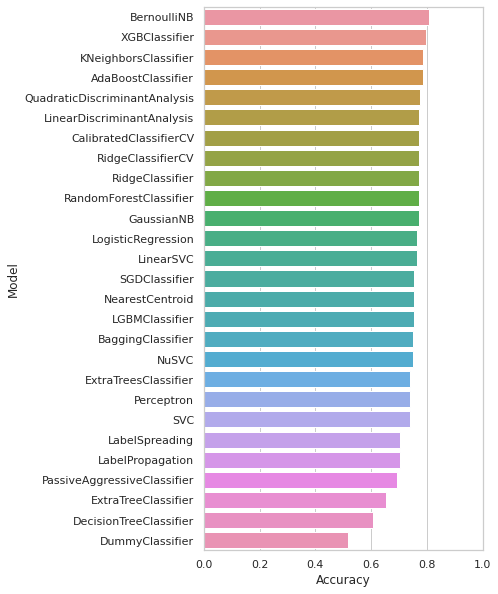

In [41]:
# Plot of Accuracy 
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10)) # set figure size 5 by 10
sns.set_theme(style="whitegrid") # set white grid theme

ax = sns.barplot(y=models.index, x="Accuracy", data=models) # take barplot with accuracy on the x-axis and model on the y-axis
ax.set(xlim=(0, 1)) # x-axis is limited within 0 to 1

Plot and Calculate Matthews Correlation Matrix

[(0.0, 1.0)]

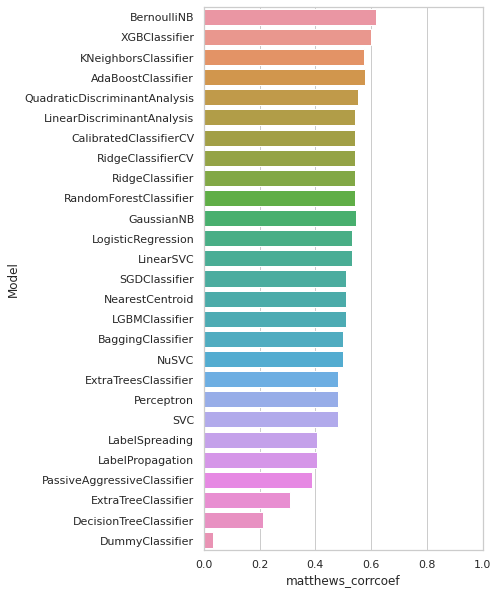

In [42]:
# Plot of MCC(matthews correlation coefficient)

plt.figure(figsize=(5, 10)) # set figure size 5 by 10
sns.set_theme(style="whitegrid") # set white grid theme
ax = sns.barplot(y=models.index, x="matthews_corrcoef", data=models) # take barplot with accuracy on the x-axis and model on the y-axis
ax.set(xlim=(0, 1)) # x-axis is limited within 0 to 1

---

# **Random Forest**

In [43]:
# Build random forest model

from sklearn.ensemble import RandomForestClassifier # import RandomForestClassifier from sklearn.ensemble

rf = RandomForestClassifier(n_estimators=500) # build RandomForestClassifier with number of trees=500

rf.fit(X_train, y_train) # fit RandomForestClassifier on training data

RandomForestClassifier(n_estimators=500)

### **Apply the model to make predictions**

In [44]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

### **Model performance**

In [45]:
feature_train['class'] # print the class column of feature_train

0       positive
1       positive
2       positive
3       positive
4       positive
          ...   
1417    negative
1418    negative
1419    negative
1420    negative
1421    negative
Name: class, Length: 2759, dtype: object

In [46]:
# Simplest and quickest way to obtain the model performance (Accuracy)
rf.score(X_test,y_test)

0.7712765957446809

In [47]:
# Accuracy
from sklearn.metrics import accuracy_score # import accuracy_score form sklearn.metrics

accuracy_score(y_test, y_test_pred) # calculate accuracy score 

0.7712765957446809

In [48]:
# Matthew Correlation Coefficient
from sklearn.metrics import matthews_corrcoef # import matthews_corrcoef form sklearn.metrics

matthews_corrcoef(y_test, y_test_pred) # calculate matthews_corrcoef

0.5428297143559941

In [49]:
# Confusion matrix
from sklearn.metrics import confusion_matrix # import confusion_matrix form sklearn.metrics

confusion_matrix(y_test, y_test_pred) # calculate confusion_matrix

array([[74, 20],
       [23, 71]])

In [50]:
# Classification report
from sklearn.metrics import classification_report # import classification_report form sklearn.metrics

model_report = classification_report(y_train, y_train_pred, target_names=['positive','negative']) # generate classification_report

# write the classification_report in 'model_report.txt' file
with open('model_report.txt','w') as f:
  f.writelines(model_report) 


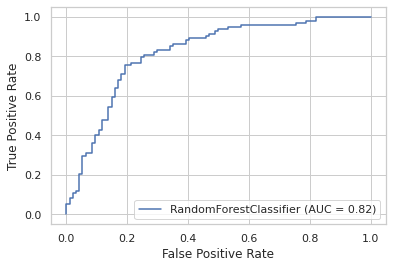

In [51]:
# ROC curve
import matplotlib.pyplot as plt 
from sklearn.metrics import plot_roc_curve # import plot_roc_curve form sklearn.metrics

plot_roc_curve(rf, X_test, y_test)  # plot roc_curve on RandomForestClassifier model's performance on X_test and y_test
plt.show() # show the plot

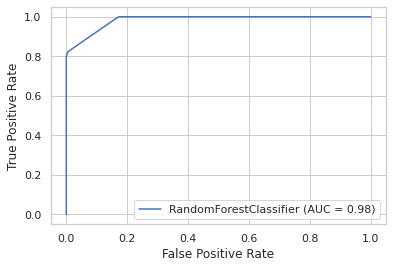

In [52]:
plot_roc_curve(rf, X_train, y_train) # plot roc_curve on RandomForestClassifier model's performance on X_train and y_train
plt.show() # show the plot

### **Feature importance**

In [53]:
# Display Dataframe of the dataset after feature selection (variance threshold)
X_train2

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,AAC_M,AAC_N,AAC_P,AAC_Q,AAC_R,AAC_S,AAC_T,AAC_V,AAC_W,AAC_Y
0,27.27,0.00,9.09,0.00,9.09,9.09,0.00,0.00,0.00,0.00,0.00,9.09,9.09,0.00,0.00,0.00,0.00,18.18,0.00,9.09
1,0.00,54.55,0.00,9.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.18,18.18,0.00,0.00,0.00
2,0.00,0.00,9.09,18.18,9.09,9.09,9.09,0.00,0.00,9.09,9.09,0.00,18.18,0.00,0.00,0.00,0.00,9.09,0.00,0.00
3,0.00,0.00,0.00,18.18,9.09,9.09,9.09,0.00,0.00,9.09,9.09,9.09,18.18,0.00,0.00,0.00,0.00,9.09,0.00,0.00
4,0.00,0.00,9.09,18.18,18.18,9.09,0.00,0.00,0.00,9.09,9.09,9.09,18.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,13.33,0.00,3.33,3.33,0.00,13.33,0.00,3.33,26.67,10.00,3.33,3.33,3.33,3.33,0.00,0.00,3.33,0.00,10.00,0.00
1418,6.67,0.00,0.00,3.33,6.67,20.00,3.33,3.33,13.33,13.33,3.33,0.00,3.33,10.00,0.00,6.67,3.33,3.33,0.00,0.00
1419,6.67,20.00,0.00,3.33,0.00,10.00,0.00,6.67,10.00,3.33,0.00,3.33,6.67,0.00,0.00,6.67,6.67,10.00,0.00,6.67
1420,6.67,0.00,3.33,3.33,6.67,0.00,3.33,3.33,3.33,6.67,3.33,16.67,3.33,6.67,10.00,6.67,0.00,13.33,0.00,3.33


In [54]:
# Retrieve feature importance from the RF model
importance = pd.Series(rf.feature_importances_, name = 'Gini')

# Retrieve feature names
feature_names = pd.Series(X_train2.columns, name = 'Feature')

In [55]:
# Combine feature names and Gini values into a Dataframe
df = pd.concat([feature_names, importance], axis=1, names=['Feature', 'Gini'])
df

,Feature,Gini
0,AAC_A,0.05
1,AAC_C,0.04
2,AAC_D,0.09
3,AAC_E,0.08
4,AAC_F,0.04
5,AAC_G,0.05
6,AAC_H,0.02
7,AAC_I,0.05
8,AAC_K,0.09
9,AAC_L,0.07


Text(0.5, 0, 'Feature Importance')

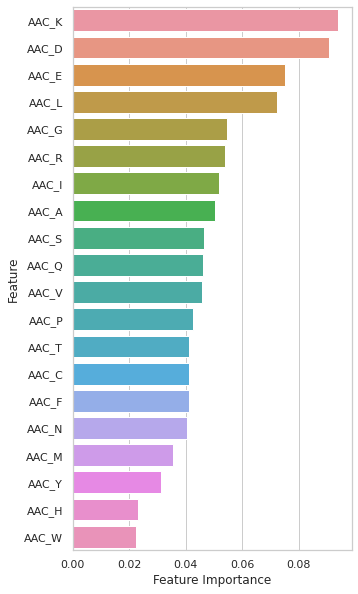

In [56]:
# Plot of feature importance
import matplotlib.pyplot as plt 
import seaborn as sns

# Plot the features based on Gini index in ascending order
df_sorted = df.sort_values('Gini', ascending=False)[:20] # Sort by Gini in descending order; Showing only the top 20 results

plt.figure(figsize=(5, 10)) # set figure size 5 by 10
sns.set_theme(style="whitegrid") # set theme to be whitegrid
ax = sns.barplot(x = 'Gini', y = 'Feature', data = df_sorted) # generate barplot with gini index on the x-axis and feature on the y-axis
plt.xlabel("Feature Importance") # set x label as Feature Importance

---